In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torchvision import datasets
from transformers import AutoTokenizer, AutoModel
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import math

In [95]:
path="other model test results.csv"
models_loader = pd.read_csv(
    path,
    sep=';',
    names=['model_name',
           'case_noun',
           'degree_adj',
           'mood_verb',
           'number_adj',
           'number_noun',
           'number_psor_noun',
           'number_verb',
           'person_psor_noun',
           'person_verb',
           'tense_verb',
           'verbform_verb'
          ],
    quoting=3
)

In [96]:
models_loader

,model_name,case_noun,degree_adj,mood_verb,number_adj,number_noun,number_psor_noun,number_verb,person_psor_noun,person_verb,tense_verb,verbform_verb
0,BERT,case_noun,degree_adj,mood_verb,number_adj,number_noun,number_psor_noun,number_verb,person_psor_noun,person_verb,tense_verb,verbform_verb
1,embedding,0.9167,0.7164,0.6350,0.9450,0.8400,0.8650,0.9250,0.7164,0.9055,0.8250,0.9000
2,layer 1,0.9398,0.7662,0.8350,0.9650,0.8850,0.9050,0.9300,0.8955,0.9403,0.9250,0.9650
3,layer 2,0.9491,0.8209,0.8500,0.9750,0.8950,0.9200,0.9300,0.9005,0.9353,0.9300,0.9650
4,layer 3,0.9583,0.9055,0.8800,0.9750,0.9250,0.9300,0.9350,0.9104,0.9254,0.9400,0.9550
5,layer 4,0.9583,0.8806,0.8650,0.9700,0.9250,0.9400,0.9500,0.9254,0.9403,0.9200,0.9600
6,layer 5,0.9583,0.9204,0.8350,0.9700,0.9350,0.9500,0.9500,0.9005,0.9353,0.9050,0.9650
7,layer 6,0.9583,0.9403,0.8450,0.9700,0.9500,0.9450,0.9450,0.9104,0.9303,0.9100,0.9700
8,layer 7,0.9630,0.9353,0.8250,0.9700,0.9550,0.9500,0.9550,0.9204,0.9154,0.9350,0.9750
9,layer 8,0.9630,0.9303,0.7500,0.9700,0.9450,0.9350,0.9450,0.9005,0.9055,0.9000,0.9800


In [97]:
roberta = models_loader.iloc[16:,0:]


In [98]:
bert = models_loader.iloc[1:14,0:]


In [99]:
path="hubert_results.csv"
hubert = pd.read_csv(
    path,
    sep=',',
    names=['model_name',
           'case_noun',
           'degree_adj',
           'mood_verb',
           'number_adj',
           'number_noun',
           'number_psor_noun',
           'number_verb',
           'person_psor_noun',
           'person_verb',
           'tense_verb',
           'verbform_verb'
          ],
    quoting=3
)
hubert=hubert.iloc[1:,:]


In [100]:
headers=hubert.columns[1:]
for h in headers:
    if h!="model_name" :
        hubert[h]=pd.to_numeric(hubert[h], downcast="float")
        roberta[h]=pd.to_numeric(roberta[h], downcast="float")
        bert[h]=pd.to_numeric(bert[h], downcast="float")

In [101]:
hubert

,model_name,case_noun,degree_adj,mood_verb,number_adj,number_noun,number_psor_noun,number_verb,person_psor_noun,person_verb,tense_verb,verbform_verb
1,embedding,0.9491,0.6866,0.845,0.950,0.865,0.945,0.955,0.8607,0.9602,0.905,0.950
2,Layer 1,0.9722,0.9303,0.985,0.985,0.975,0.960,0.965,0.9040,0.9801,0.970,0.980
3,Layer 2,0.9769,0.9701,0.950,0.995,0.970,0.935,0.980,0.9353,0.9701,0.980,0.985
4,Layer 3,0.9769,0.9602,0.955,0.995,0.980,0.960,0.995,0.9303,0.9751,0.975,0.985
5,Layer 4,0.9769,0.9652,0.945,0.995,0.970,0.955,0.990,0.9104,0.9701,0.970,0.995
6,Layer 5,0.9769,0.9602,0.945,0.995,0.980,0.955,0.995,0.9154,0.9751,0.975,1.000
7,Layer 6,0.9769,0.9602,0.945,0.990,0.990,0.955,0.985,0.9104,0.9652,0.975,1.000
8,Layer 7,0.9769,0.9502,0.945,0.990,0.980,0.975,0.970,0.9303,0.9652,0.970,1.000
9,Layer 8,0.9769,0.9453,0.940,0.990,0.980,0.965,0.975,0.9055,0.9652,0.975,1.000
10,Layer 9,0.9769,0.9502,0.950,0.985,0.980,0.975,0.970,0.8905,0.9602,0.970,1.000


In [102]:
plt.rcParams['figure.figsize'] = [15,20]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D57F66D48>,
      dtype=object)

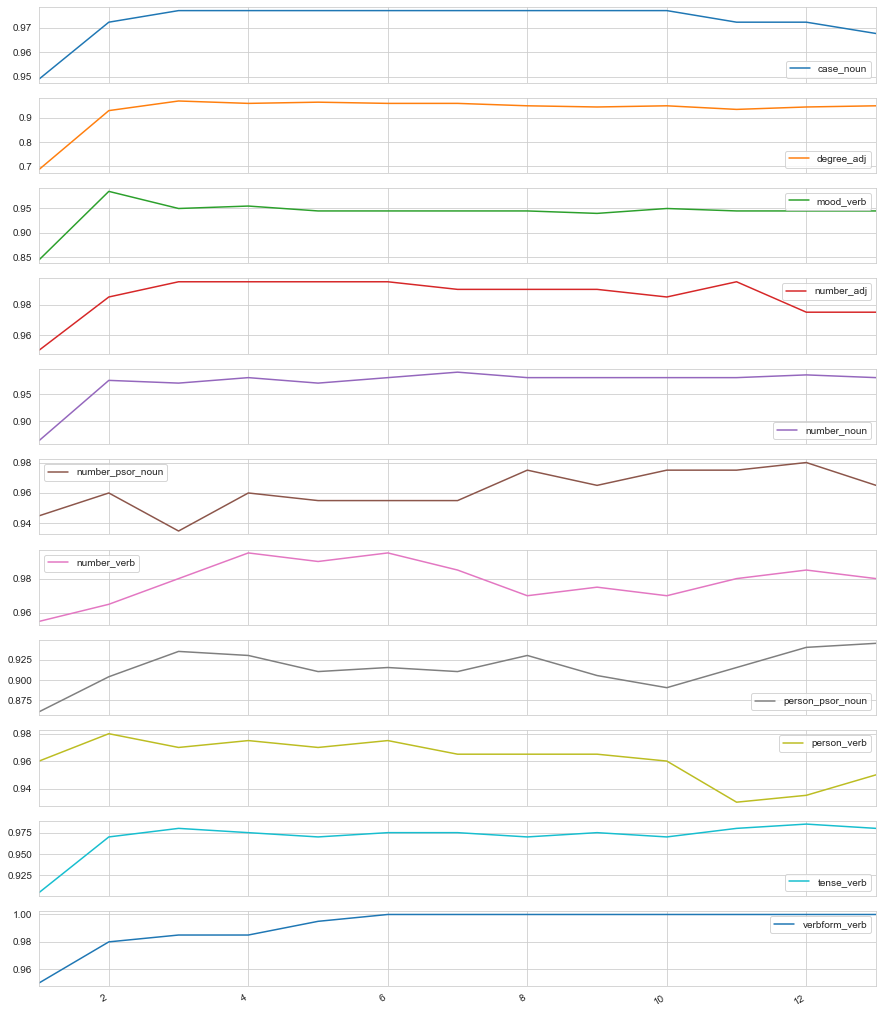

In [103]:
hubert.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D57F613C8>,
      dtype=object)

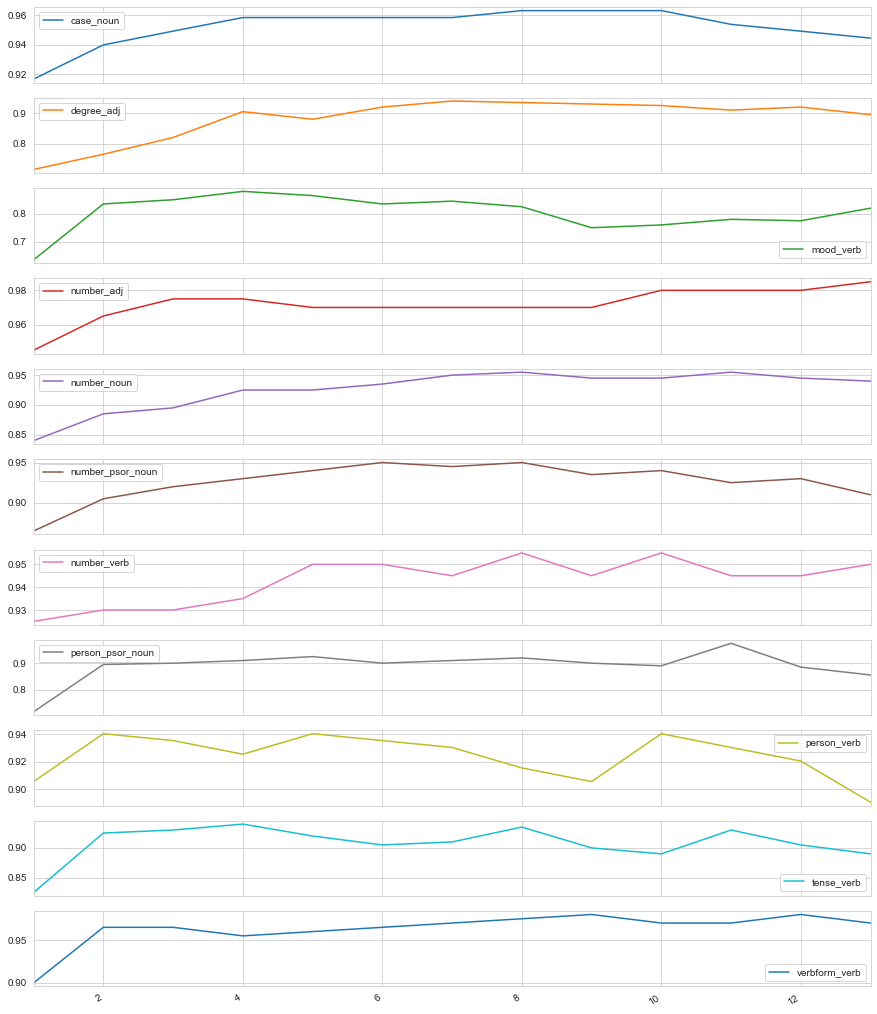

In [104]:
bert.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D530C42C8>,
      dtype=object)

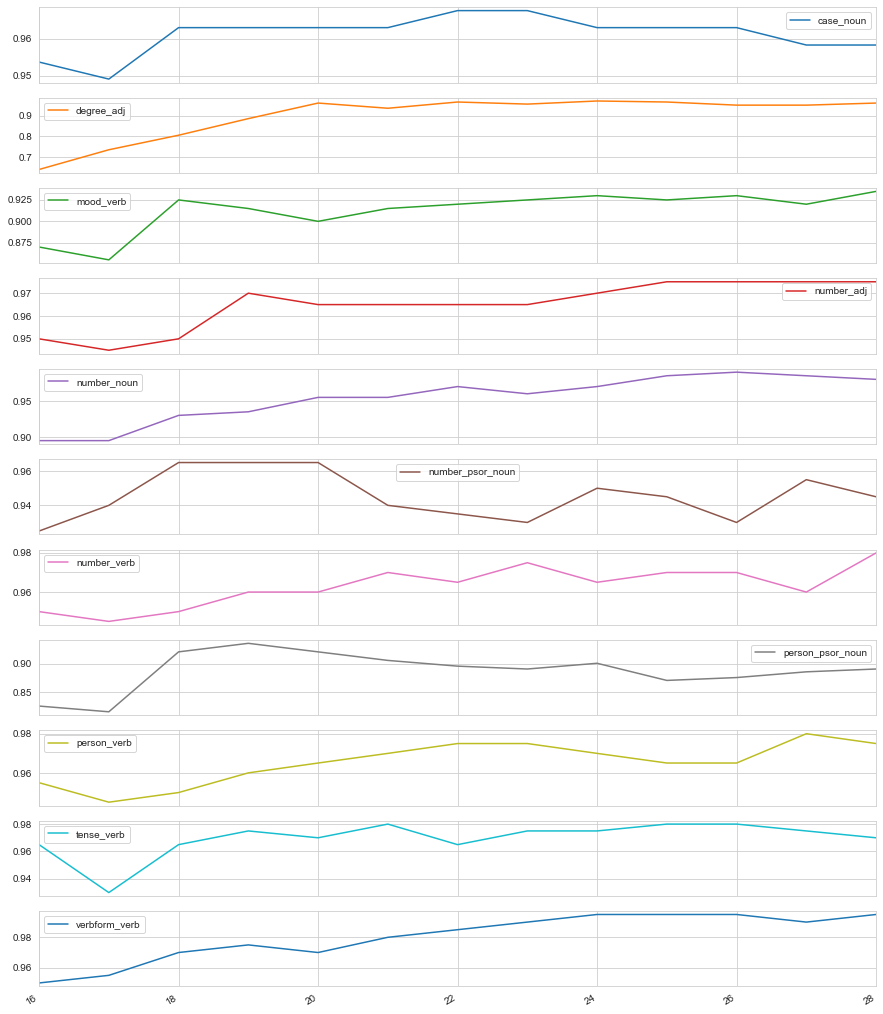

In [105]:
roberta.plot(subplots=True, fontsize=10)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


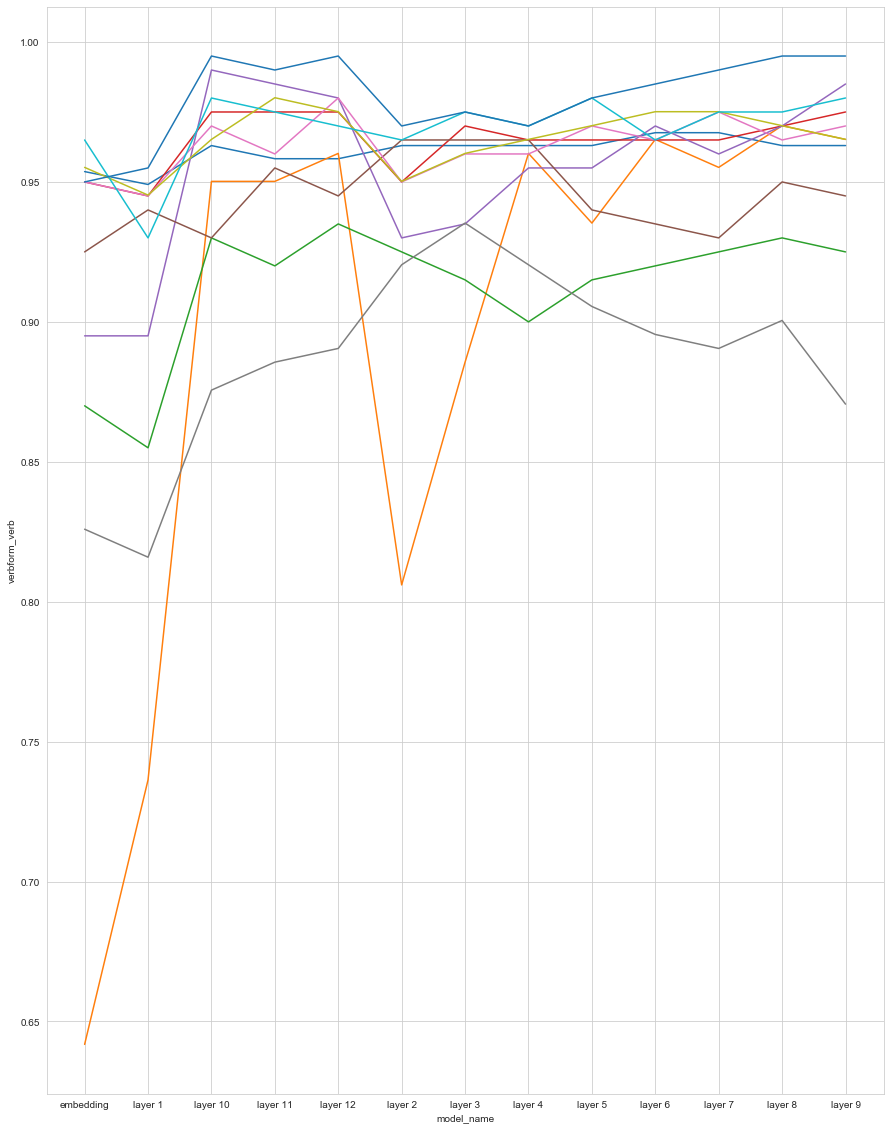

In [106]:
for h in headers:
    print(sns.lineplot(x=roberta["model_name"], y=roberta[h]))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


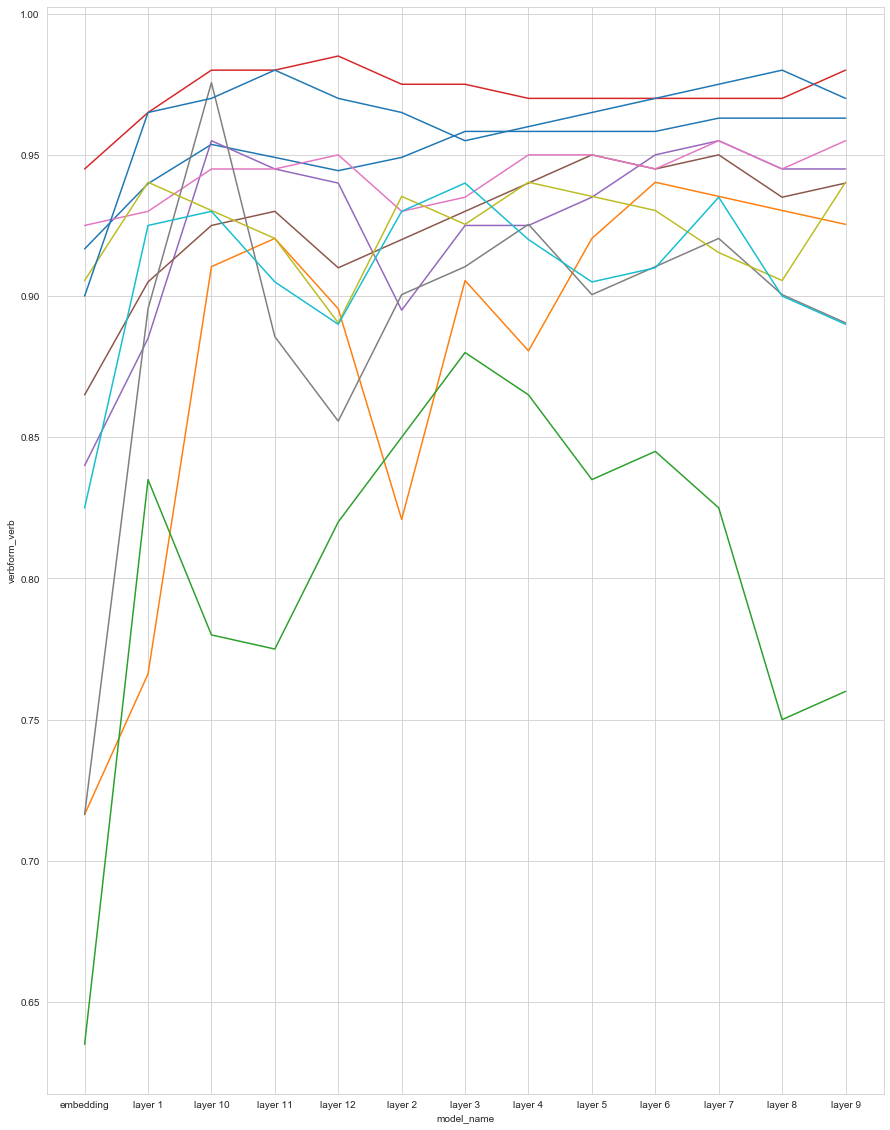

In [107]:
for h in headers:
    print(sns.lineplot(x=bert["model_name"], y=bert[h]))

In [108]:
hubert

,model_name,case_noun,degree_adj,mood_verb,number_adj,number_noun,number_psor_noun,number_verb,person_psor_noun,person_verb,tense_verb,verbform_verb
1,embedding,0.9491,0.6866,0.845,0.950,0.865,0.945,0.955,0.8607,0.9602,0.905,0.950
2,Layer 1,0.9722,0.9303,0.985,0.985,0.975,0.960,0.965,0.9040,0.9801,0.970,0.980
3,Layer 2,0.9769,0.9701,0.950,0.995,0.970,0.935,0.980,0.9353,0.9701,0.980,0.985
4,Layer 3,0.9769,0.9602,0.955,0.995,0.980,0.960,0.995,0.9303,0.9751,0.975,0.985
5,Layer 4,0.9769,0.9652,0.945,0.995,0.970,0.955,0.990,0.9104,0.9701,0.970,0.995
6,Layer 5,0.9769,0.9602,0.945,0.995,0.980,0.955,0.995,0.9154,0.9751,0.975,1.000
7,Layer 6,0.9769,0.9602,0.945,0.990,0.990,0.955,0.985,0.9104,0.9652,0.975,1.000
8,Layer 7,0.9769,0.9502,0.945,0.990,0.980,0.975,0.970,0.9303,0.9652,0.970,1.000
9,Layer 8,0.9769,0.9453,0.940,0.990,0.980,0.965,0.975,0.9055,0.9652,0.975,1.000
10,Layer 9,0.9769,0.9502,0.950,0.985,0.980,0.975,0.970,0.8905,0.9602,0.970,1.000


In [109]:
 listi = [1,2,3,4,5]
for i in range(len(listi)):
    print(listi[i])

1
2
3
4
5


In [110]:
tasks=[]
test_acc=[]
layers=[]
model=[]

for i in range(len(bert["model_name"])):
    for j in range(len(bert.columns)):
        if(j!=0):
            tasks.append(bert.columns[j])
            test_acc.append(bert.iloc[i,j])
            layers.append(bert.iloc[i,0])
            model.append("bert")
        
for i in range(len(hubert["model_name"])):
    for j in range(len(hubert.columns)):
        if(j!=0):
            tasks.append(hubert.columns[j])
            test_acc.append(hubert.iloc[i,j])
            layers.append(hubert.iloc[i,0])
            model.append("hubert")
            
for i in range(len(roberta["model_name"])):
    for j in range(len(roberta.columns)):
        if(j!=0):
            tasks.append(roberta.columns[j])
            test_acc.append(roberta.iloc[i,j])
            layers.append(roberta.iloc[i,0])
            model.append("roberta")

In [111]:
plotter = pd.DataFrame({
        'task': tasks,
        'test_acc': test_acc,
        'layer': layers,
        'model': model
    })

In [112]:
plotter

,task,test_acc,layer,model
0,case_noun,0.9167,embedding,bert
1,degree_adj,0.7164,embedding,bert
2,mood_verb,0.6350,embedding,bert
3,number_adj,0.9450,embedding,bert
4,number_noun,0.8400,embedding,bert
...,...,...,...,...
424,number_verb,0.9800,layer 12,roberta
425,person_psor_noun,0.8905,layer 12,roberta
426,person_verb,0.9751,layer 12,roberta
427,tense_verb,0.9700,layer 12,roberta


In [113]:
for i in range(len(plotter["layer"])):
    if plotter["layer"][i] == "embedding":
        plotter["layer"][i] = 0
    if plotter["layer"][i] == "layer 1" or plotter["layer"][i] == "Layer 1":
        plotter["layer"][i] = 1
    if plotter["layer"][i] == "layer 2" or plotter["layer"][i] == "Layer 2":
        plotter["layer"][i] = 2
    if plotter["layer"][i] == "layer 3" or plotter["layer"][i] == "Layer 3":
        plotter["layer"][i] = 3
    if plotter["layer"][i] == "layer 4" or plotter["layer"][i] == "Layer 4":
        plotter["layer"][i] = 4
    if plotter["layer"][i] == "layer 5" or plotter["layer"][i] == "Layer 5":
        plotter["layer"][i] = 5
    if plotter["layer"][i] == "layer 6" or plotter["layer"][i] == "Layer 6":
        plotter["layer"][i] = 6
    if plotter["layer"][i] == "layer 7" or plotter["layer"][i] == "Layer 7":
        plotter["layer"][i] = 7
    if plotter["layer"][i] == "layer 8" or plotter["layer"][i] == "Layer 8":
        plotter["layer"][i] = 8
    if plotter["layer"][i] == "layer 9" or plotter["layer"][i] == "Layer 9":
        plotter["layer"][i] = 9
    if plotter["layer"][i] == "layer 10" or plotter["layer"][i] == "Layer 10":
        plotter["layer"][i] = 10
    if plotter["layer"][i] == "layer 11" or plotter["layer"][i] == "Layer 11":
        plotter["layer"][i] = 11
    if plotter["layer"][i] == "layer 12" or plotter["layer"][i] == "Layer 12":
        plotter["layer"][i] = 12

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Pr

In [114]:
plotter

,task,test_acc,layer,model
0,case_noun,0.9167,0,bert
1,degree_adj,0.7164,0,bert
2,mood_verb,0.6350,0,bert
3,number_adj,0.9450,0,bert
4,number_noun,0.8400,0,bert
...,...,...,...,...
424,number_verb,0.9800,12,roberta
425,person_psor_noun,0.8905,12,roberta
426,person_verb,0.9751,12,roberta
427,tense_verb,0.9700,12,roberta


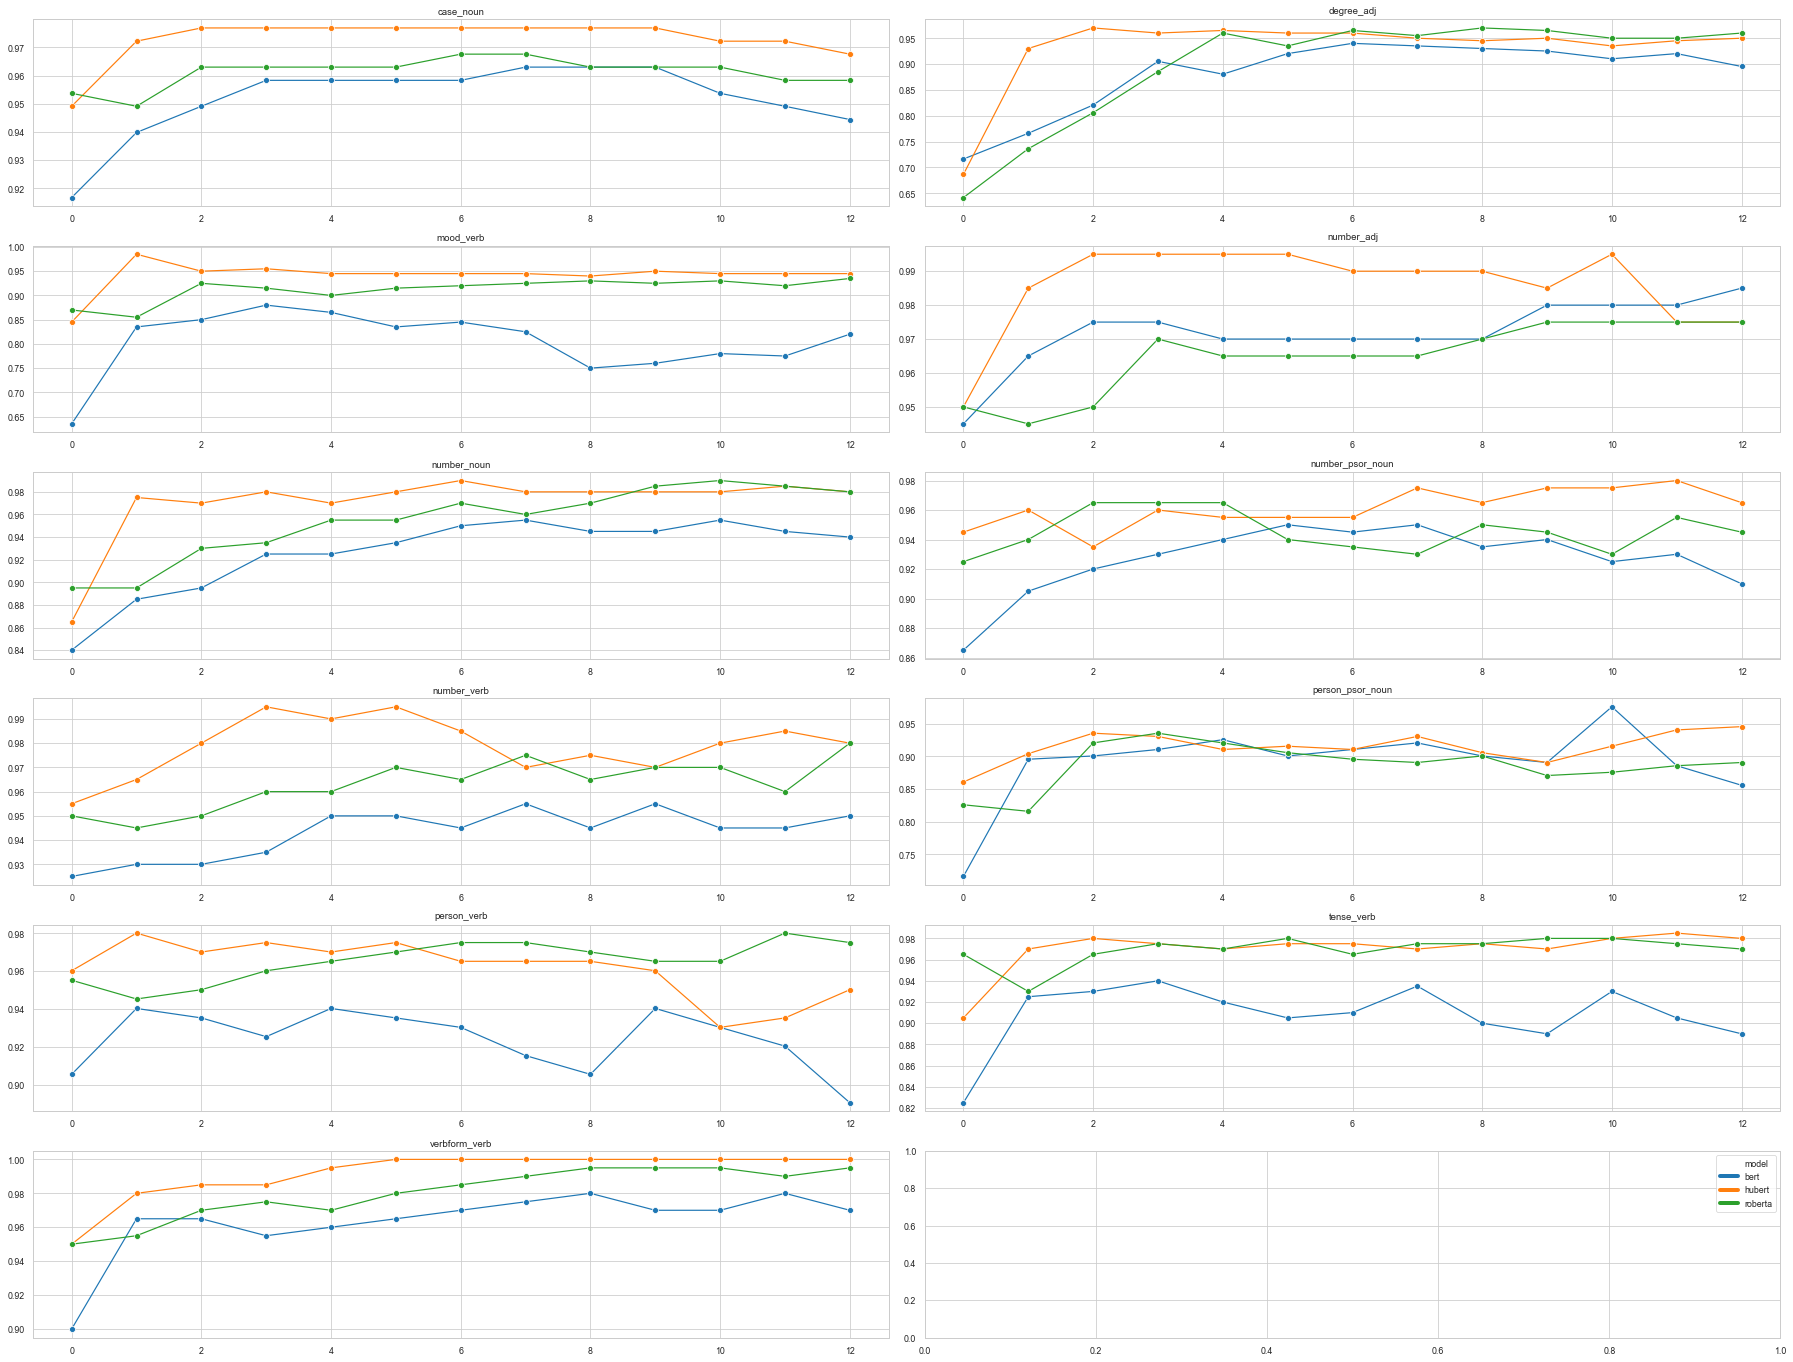

In [123]:
sns.set_style('whitegrid')
with sns.plotting_context('paper'):
    fig, axes = plt.subplots(6, 2, figsize=(25, 19))

    for ti, (task, group) in enumerate(plotter.groupby(['task'])):
        ax = axes.flat[ti]
        if ti == 0:
            sns.lineplot(x=group.layer, y=group.test_acc, hue=group.model,
                         markersize=6, marker='o', ax=ax)
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
        else:
            sns.lineplot(x=group.layer, y=group.test_acc, hue=group.model,
                         markersize=6, marker='o', ax=ax, legend=False)
        ax.set_title(task)
        ax.set_xlabel("")
        ax.set_ylabel("")
        # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        leg = axes.flat[-1].legend(handles, labels)
        for line in leg.get_lines():
            line.set_linewidth(4.0)
        plt.tight_layout()
        fig.savefig("line_morph_layerwise.pdf")
